----------
**Blood-Brain Barrier Permeability**
=====================================


----------

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Read the data</a> 
    - <a href='#1.3'>1.3. Label Encoder</a> 
    - <a href='#1.4'>1.4. Missing values(Clean Data)</a> 
- <a href='#2'>2. Exploratory Data Analysis (EDA)</a> 
    - <a href='#2.1'>2.1. Head and describe</a> 
    - <a href='#2.2'>2.2. Target distribution (number and %)</a> 
    
- <a href='#3'>3. Prepare dataset</a>
    - <a href='#3.1'>3.1. Define (X,  y)</a> 
    - <a href='#3.2'>3.2. Standard scaler (X)</a> 
    - <a href='#3.3'>3.3. Train test split</a> 
    
- <a href='#4'>4. Define matrics</a>
    - <a href='#4.1'>4.1. Confusion matrix and show metrics</a> 
    - <a href='#4.2'>4.2. ROC curve</a> 

- <a href='#5'>5. Predictive model 1 :  Gradient Boosting Machine(GBM)</a>
    - <a href='#5.1'>5.1. Gradient Boosting classifer  and GridSearch CV to optimise hyperparameters </a> 
    - <a href='#5.1'>5.2. Feature Selection</a> 
    
- <a href='#6'>6. Predictive model 2 : Logistic Regression</a>
    - <a href='#6.1'>6.1. Gradient Boosting classifer  and GridSearch CV to optimise hyperparameters </a> 
      

- <a href='#7'>7. Predictive model 3 : Logistic Regression</a>
    - <a href='#7.1'>7.1. Gradient Boosting classifer  and GridSearch CV to optimise hyperparameters </a> 
    
- <a href='#8'>8. Predictive model 4 : Support vector machine (SVM)</a>
    - <a href='#8.1'>8.1. Support vector machine (SVM)  and GridSearch CV to optimise hyperparameters </a> 
    
- <a href='#9'>9. Predictive model 5 : K-Nearst Neighbor(KNN)</a>
    - <a href='#9.1'>9.1. K-Nearst Neighbor(KNN) and GridSearch CV to optimise hyperparameters </a>   
    
- <a href='#10'>10. Models performance plot (accuracy, precision, recall)</a> 

# <a id='1'>1. Load libraries and read the data</a> 

## <a id='1.1'>1.1. Load libraries</a> 

In [2]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain

#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 

## <a id='1.2'>1.2. Read the data</a>

In [3]:
# Read data
data = pd.read_csv('BrainData.csv')

header=data.columns.tolist()
data

,Active,x1,pmv1,x2,pmv2,x3,pmv3,x4,pmv4,x5,...,CPCM2,CPCM3,CPCM4,CPCM5,SMD1,SMD2,SMD3,SMD4,SMD5,mol
0,1,37.979584,169.997406,52.716610,404.245483,139.412445,140.044617,4.297644,292.944000,28.023092,...,-17.652098,-17.658243,-18.077089,-18.173771,-18.630166,-17.902943,-17.727189,-18.051943,-13.805539,ClC(F)(F)C(Cl)(F)F
1,1,75.030350,392.657501,66.645096,792.212769,352.056915,377.674957,-5.893218,358.615875,53.860622,...,-246.975186,-246.992635,-248.209669,-248.498814,-255.605253,-253.338243,-253.019086,-253.484498,-246.509914,C[C@H]1[C@@](N2CCCCC2)(c2sccc2)CCCC1
2,1,98.376518,503.202484,100.648026,1057.320680,443.864227,469.030701,-4.093867,533.184204,67.382744,...,-259.339213,-259.391827,-263.072341,-263.950062,-273.414022,-270.356295,-269.974022,-270.638854,-266.865933,O=C1N(C)C(=O)c2n(CCN[C@H](Cc3ccccc3)C)cnc2N1C
3,1,92.564079,468.065063,97.910751,993.392273,409.989258,431.859131,-2.538582,517.478821,64.826698,...,-226.473829,-226.524795,-230.154752,-231.040916,-237.615592,-233.523662,-233.145090,-237.488582,-234.084009,Clc1c(N2CCN(CCCNC(=O)C)CC2)cc(Cl)cc1
4,1,144.912735,737.176025,135.177597,1464.036380,662.010498,708.867981,-6.710082,714.396484,107.607346,...,-467.541003,-467.590640,-471.131830,-471.997423,-480.366616,-477.067501,-476.496823,-478.700945,-467.515321,Br[C@@H]1[C@]2(Br)[C@@](C)([C@H]3[C@H]([C@H]4[...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,1,106.650070,536.710999,110.821869,1129.715820,472.036835,498.839203,-2.783543,589.414978,75.455940,...,-272.898704,-272.937728,-275.671537,-276.324978,-284.271916,-281.089342,-280.644838,-282.759133,-275.041033,ClCCN(CCCl)c1ccc(CCCC(=O)OC(C)(C)C)cc1
1862,1,71.265938,356.409058,74.011734,750.434448,312.389557,330.091675,-1.307748,398.547150,51.422092,...,-185.547418,-185.586895,-188.406945,-189.098045,-192.462472,-190.346009,-190.060680,-192.227854,-189.151275,S=C1NC(=O)C([C@@H](CCC)C)(CC)C(=O)N1
1863,1,90.257103,464.145264,83.995193,933.989929,416.151031,445.102356,-5.074581,442.694672,65.023697,...,-290.536490,-290.571121,-293.028236,-293.624670,-298.914012,-296.539673,-296.174482,-298.275661,-293.140373,O=C1CC2=C([C@H]3[C@@H]([C@H](C)C2)[C@H]2[C@@](...
1864,1,118.440666,603.593689,117.618591,1245.296630,537.397095,569.517944,-5.163879,621.902954,82.623634,...,-304.814751,-304.867377,-308.629258,-309.552556,-318.926957,-314.517817,-314.039653,-316.027914,-310.820848,Fc1ccc(C2=NC[C@H](CNC(=O)c3ccc(C)cc3)N(C)c3c2c...


In [4]:
headerx=header.copy()
headerx.remove('Active')


## <a id='1.3'>1.4. Label Encoder </a>

In [5]:
# convert to number variables
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

data.mol=lbe.fit_transform(data.mol)


data

,Active,x1,pmv1,x2,pmv2,x3,pmv3,x4,pmv4,x5,...,CPCM2,CPCM3,CPCM4,CPCM5,SMD1,SMD2,SMD3,SMD4,SMD5,mol
0,1,37.979584,169.997406,52.716610,404.245483,139.412445,140.044617,4.297644,292.944000,28.023092,...,-17.652098,-17.658243,-18.077089,-18.173771,-18.630166,-17.902943,-17.727189,-18.051943,-13.805539,124
1,1,75.030350,392.657501,66.645096,792.212769,352.056915,377.674957,-5.893218,358.615875,53.860622,...,-246.975186,-246.992635,-248.209669,-248.498814,-255.605253,-253.338243,-253.019086,-253.484498,-246.509914,92
2,1,98.376518,503.202484,100.648026,1057.320680,443.864227,469.030701,-4.093867,533.184204,67.382744,...,-259.339213,-259.391827,-263.072341,-263.950062,-273.414022,-270.356295,-269.974022,-270.638854,-266.865933,1474
3,1,92.564079,468.065063,97.910751,993.392273,409.989258,431.859131,-2.538582,517.478821,64.826698,...,-226.473829,-226.524795,-230.154752,-231.040916,-237.615592,-233.523662,-233.145090,-237.488582,-234.084009,254
4,1,144.912735,737.176025,135.177597,1464.036380,662.010498,708.867981,-6.710082,714.396484,107.607346,...,-467.541003,-467.590640,-471.131830,-471.997423,-480.366616,-477.067501,-476.496823,-478.700945,-467.515321,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,1,106.650070,536.710999,110.821869,1129.715820,472.036835,498.839203,-2.783543,589.414978,75.455940,...,-272.898704,-272.937728,-275.671537,-276.324978,-284.271916,-281.089342,-280.644838,-282.759133,-275.041033,144
1862,1,71.265938,356.409058,74.011734,750.434448,312.389557,330.091675,-1.307748,398.547150,51.422092,...,-185.547418,-185.586895,-188.406945,-189.098045,-192.462472,-190.346009,-190.060680,-192.227854,-189.151275,1834
1863,1,90.257103,464.145264,83.995193,933.989929,416.151031,445.102356,-5.074581,442.694672,65.023697,...,-290.536490,-290.571121,-293.028236,-293.624670,-298.914012,-296.539673,-296.174482,-298.275661,-293.140373,1454
1864,1,118.440666,603.593689,117.618591,1245.296630,537.397095,569.517944,-5.163879,621.902954,82.623634,...,-304.814751,-304.867377,-308.629258,-309.552556,-318.926957,-314.517817,-314.039653,-316.027914,-310.820848,637


## <a id='1.3'>1.3. Missing values(Clean Data)</a>

In [6]:
#replace non_value
#train data
data.HOMO.replace("NA",np.nan, inplace = True)
data.GapHL.replace("#VALUE!",np.nan, inplace = True)
#data.GapHL.replace("NA",np.nan, inplace = True)

In [7]:
###cleanind Data###

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(data)
data = imp.transform(data)

###into DataFrame###
data= pd.DataFrame(data,columns=header)
data

,Active,x1,pmv1,x2,pmv2,x3,pmv3,x4,pmv4,x5,...,CPCM2,CPCM3,CPCM4,CPCM5,SMD1,SMD2,SMD3,SMD4,SMD5,mol
0,1.0,37.979584,169.997406,52.716610,404.245483,139.412445,140.044617,4.297644,292.944000,28.023092,...,-17.652098,-17.658243,-18.077089,-18.173771,-18.630166,-17.902943,-17.727189,-18.051943,-13.805539,124.0
1,1.0,75.030350,392.657501,66.645096,792.212769,352.056915,377.674957,-5.893218,358.615875,53.860622,...,-246.975186,-246.992635,-248.209669,-248.498814,-255.605253,-253.338243,-253.019086,-253.484498,-246.509914,92.0
2,1.0,98.376518,503.202484,100.648026,1057.320680,443.864227,469.030701,-4.093867,533.184204,67.382744,...,-259.339213,-259.391827,-263.072341,-263.950062,-273.414022,-270.356295,-269.974022,-270.638854,-266.865933,1474.0
3,1.0,92.564079,468.065063,97.910751,993.392273,409.989258,431.859131,-2.538582,517.478821,64.826698,...,-226.473829,-226.524795,-230.154752,-231.040916,-237.615592,-233.523662,-233.145090,-237.488582,-234.084009,254.0
4,1.0,144.912735,737.176025,135.177597,1464.036380,662.010498,708.867981,-6.710082,714.396484,107.607346,...,-467.541003,-467.590640,-471.131830,-471.997423,-480.366616,-477.067501,-476.496823,-478.700945,-467.515321,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,1.0,106.650070,536.710999,110.821869,1129.715820,472.036835,498.839203,-2.783543,589.414978,75.455940,...,-272.898704,-272.937728,-275.671537,-276.324978,-284.271916,-281.089342,-280.644838,-282.759133,-275.041033,144.0
1862,1.0,71.265938,356.409058,74.011734,750.434448,312.389557,330.091675,-1.307748,398.547150,51.422092,...,-185.547418,-185.586895,-188.406945,-189.098045,-192.462472,-190.346009,-190.060680,-192.227854,-189.151275,1834.0
1863,1.0,90.257103,464.145264,83.995193,933.989929,416.151031,445.102356,-5.074581,442.694672,65.023697,...,-290.536490,-290.571121,-293.028236,-293.624670,-298.914012,-296.539673,-296.174482,-298.275661,-293.140373,1454.0
1864,1.0,118.440666,603.593689,117.618591,1245.296630,537.397095,569.517944,-5.163879,621.902954,82.623634,...,-304.814751,-304.867377,-308.629258,-309.552556,-318.926957,-314.517817,-314.039653,-316.027914,-310.820848,637.0


# <a id='2'>2. Exploratory Data Analysis (EDA)</a>

# <a id='2.1'>2.1. Head and describe</a> 

In [8]:
# Heads
data.head()

,Active,x1,pmv1,x2,pmv2,x3,pmv3,x4,pmv4,x5,...,CPCM2,CPCM3,CPCM4,CPCM5,SMD1,SMD2,SMD3,SMD4,SMD5,mol
0,1.0,37.979584,169.997406,52.716610,404.245483,139.412445,140.044617,4.297644,292.944000,28.023092,...,-17.652098,-17.658243,-18.077089,-18.173771,-18.630166,-17.902943,-17.727189,-18.051943,-13.805539,124.0
1,1.0,75.030350,392.657501,66.645096,792.212769,352.056915,377.674957,-5.893218,358.615875,53.860622,...,-246.975186,-246.992635,-248.209669,-248.498814,-255.605253,-253.338243,-253.019086,-253.484498,-246.509914,92.0
2,1.0,98.376518,503.202484,100.648026,1057.320680,443.864227,469.030701,-4.093867,533.184204,67.382744,...,-259.339213,-259.391827,-263.072341,-263.950062,-273.414022,-270.356295,-269.974022,-270.638854,-266.865933,1474.0
3,1.0,92.564079,468.065063,97.910751,993.392273,409.989258,431.859131,-2.538582,517.478821,64.826698,...,-226.473829,-226.524795,-230.154752,-231.040916,-237.615592,-233.523662,-233.145090,-237.488582,-234.084009,254.0
4,1.0,144.912735,737.176025,135.177597,1464.036380,662.010498,708.867981,-6.710082,714.396484,107.607346,...,-467.541003,-467.590640,-471.131830,-471.997423,-480.366616,-477.067501,-476.496823,-478.700945,-467.515321,8.0


In [9]:
# describe
data.describe()

,Active,x1,pmv1,x2,pmv2,x3,pmv3,x4,pmv4,x5,...,CPCM2,CPCM3,CPCM4,CPCM5,SMD1,SMD2,SMD3,SMD4,SMD5,mol
count,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,...,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,0.770632,50.717953,275.327266,97.975531,1015.342643,436.871471,462.920769,-3.411093,520.581391,66.812629,...,-252.555750,-252.615433,-256.665009,-257.764217,-262.582055,-259.245445,-258.865652,-262.448119,-260.317392,929.540193
std,0.420539,535.205332,2507.971211,41.215621,395.327608,193.177404,207.159636,2.711284,215.458589,30.858896,...,119.962351,119.976701,121.204281,121.437335,124.384748,121.522503,121.401724,122.661428,122.199318,537.948063
min,0.000000,-6085.390140,-28468.781200,0.000000,1.814795,0.000000,0.323664,-15.245303,13.591911,-0.941217,...,-1107.615462,-1107.776664,-1119.376836,-1122.244564,-1133.447575,-1123.575656,-1122.273792,-1138.217611,-1130.748096,0.000000
25%,1.000000,72.538952,371.836265,74.722136,792.198533,330.209076,348.802902,-5.351070,399.202163,49.733242,...,-302.121545,-302.176789,-307.231832,-308.210090,-314.171685,-310.181102,-309.758829,-314.469211,-311.738417,464.250000
50%,1.000000,91.029713,466.091766,91.540108,968.162994,414.318390,438.220275,-3.393345,485.146759,63.284294,...,-237.491555,-237.553645,-241.668455,-242.431730,-248.199777,-244.128476,-243.797626,-247.073720,-244.224281,929.500000
75%,1.000000,111.484985,568.437256,111.519054,1170.851285,506.560150,536.786316,-1.635543,590.198120,76.863834,...,-179.405837,-179.444336,-182.572061,-183.578023,-188.856138,-185.789308,-185.440250,-187.581880,-185.976207,1394.750000
max,1.000000,574.993042,2758.452150,559.031616,5053.585940,2497.807130,2662.668460,16.307638,2984.053960,394.841949,...,146.454563,146.450181,146.129549,146.048671,644.334256,148.820366,148.914701,150.544224,147.974963,1861.000000


# <a id='3'>3. Prepare dataset</a>

## <a id='3.1'>3.1. Define (X,  y)</a>

* y = diagnosis (target)
* X = features (x1, area_se, ....) 



In [10]:
# Def X and Y
y = data.Active
X = data.drop('Active', 1)
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1861    1.0
1862    1.0
1863    1.0
1864    1.0
1865    1.0
Name: Active, Length: 1866, dtype: float64

## <a id='3.2'>3.2. Standard scaler (X)</a>

In [11]:
# Normalization train data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X= pd.DataFrame(X,columns=headerx)
X

,x1,pmv1,x2,pmv2,x3,pmv3,x4,pmv4,x5,pmv5,...,CPCM2,CPCM3,CPCM4,CPCM5,SMD1,SMD2,SMD3,SMD4,SMD5,mol
0,-0.023807,-0.042009,-1.098396,-1.546214,-1.540236,-1.559004,2.843967,-1.056808,-1.257334,-1.514019,...,1.958670,1.958882,1.969005,1.973484,1.961794,1.986523,1.986818,1.992979,2.017834,-1.497833
1,0.045438,0.046795,-0.760363,-0.564569,-0.439168,-0.411608,-0.915725,-0.751926,-0.419830,-0.461466,...,0.046532,0.046878,0.069780,0.076318,0.056106,0.048623,0.048172,0.073096,0.113022,-1.557334
2,0.089071,0.090885,0.064859,0.106214,0.036208,0.029502,-0.251895,0.058509,0.018480,0.045942,...,-0.056562,-0.056496,-0.052878,-0.050952,-0.087108,-0.091455,-0.091525,-0.066793,-0.053603,1.012376
3,0.078208,0.076871,-0.001572,-0.055539,-0.139195,-0.149981,0.321893,-0.014404,-0.064372,-0.118558,...,0.217476,0.217523,0.218782,0.220117,0.200773,0.211719,0.211920,0.203538,0.214735,-1.256109
4,0.176045,0.184202,0.902863,1.135296,1.165765,1.187553,-1.217089,0.899788,1.322330,1.176492,...,-1.792586,-1.792288,-1.769940,-1.764619,-1.751364,-1.792923,-1.793134,-1.763479,-1.696028,-1.713525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,0.104534,0.104249,0.311770,0.289390,0.182085,0.173432,0.231520,0.319560,0.280166,0.203997,...,-0.169623,-0.169431,-0.156856,-0.152883,-0.174424,-0.179800,-0.179446,-0.165630,-0.120521,-1.460644
1862,0.038403,0.032338,-0.581581,-0.670278,-0.644564,-0.641364,0.775983,-0.566545,-0.498873,-0.639685,...,0.558728,0.558829,0.563316,0.565597,0.563882,0.567121,0.566906,0.572626,0.582533,1.681765
1863,0.073896,0.075307,-0.339291,-0.205841,-0.107290,-0.086036,-0.613707,-0.361590,-0.057987,-0.131670,...,-0.316690,-0.316444,-0.300096,-0.295379,-0.292172,-0.306974,-0.307400,-0.292163,-0.268674,0.975188
1864,0.126570,0.130924,0.476720,0.581835,0.520519,0.514703,-0.646652,0.470386,0.512502,0.525767,...,-0.435745,-0.435634,-0.428848,-0.426576,-0.453110,-0.454954,-0.454596,-0.436928,-0.413398,-0.543953


## <a id='3.3'>3.3. Train test split</a>

In [12]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)

# <a id='4'>4. Define functions</a>

This part is essential to measure the performance of a model : roc, confusion matrix ...

## <a id='4.1'>4.1. Confusion matrix and show metrics</a>

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :
* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant 
* false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics : 
* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)


In [13]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy    =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision   =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall      =     {:.3f}'.format(tp/(tp+fn)))
    print('Specificity =     {:.3f}'.format(tn/(tn+fp)))
    print('F1_score    =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [14]:
def score(y_test, y_pred):
    AccScore = accuracy_score(y_test, y_pred)
    PrecisionScore = precision_score(y_test, y_pred)
    RecallScore = recall_score(y_test, y_pred)
    
    scoreList=[AccScore,PrecisionScore,RecallScore]
    return scoreList

In [15]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

## <a id='4.2'>4.2. ROC curve</a>

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [16]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

 # <a id='5'>5. Predictive model : Gradient Boosting</a>

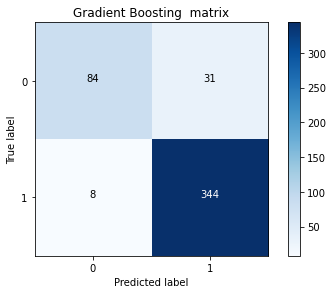

Accuracy    =     0.916
Precision   =     0.917
Recall      =     0.977
Specificity =     0.730
F1_score    =     0.946


In [17]:
gbc = GradientBoostingClassifier()

gbc=gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
#y_score = gbc.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Gradient Boosting  matrix')

plt.show()

show_metrics()
gbc_score=score(y_test, y_pred)


## <a id='5.1'>5.1.  Gradient Boosting  and GridSearch CV to optimise hyperparameters </a>

# Find the best parameters 
gbc =  GradientBoostingClassifier() 

parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

CV_gbc = GridSearchCV(estimator = gbc, param_grid = parameters ,  cv = 2, n_jobs=-1)
CV_gbc.fit(X_train, y_train)

best_parameters = CV_GBC.best_params_
print("\n The best score across ALL searched params:\n",CV_GBC.best_score_)
print('The best parameters for using this model is', best_parameters)

###### Log with best hyperparameters
CV_gbc = GradientBoostingClassifier(learning_rate = best_parameters['learning_rate'], 
                               max_depth = best_parameters['max_depth'], 
                                n_estimators = best_parameters['n_estimators'], 
                                 subsample = best_parameters['subsample'])


CV_gbc.fit(X_train, y_train)
y_pred = CV_gbc.predict(X_test)
y_score = CV_gbc.decision_function(X_test)

#### Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Gradient Boosting  matrix')

plt.show()

show_metrics()
CV_gbc_score=score(y_test, y_pred)
##### ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

## <a id='5.2'>5.2.  Gradient Boosting  and Feature Selection </a>

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [19]:
sel = SelectFromModel(RandomForestClassifier(),max_features = 11) 
sel.fit(X, y)
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)
print('X Shape is ' , X_train_new.shape)
print('Selected Features are : ' , sel.get_support())

X Shape is  (1399, 11)
Selected Features are :  [False False  True False False False  True  True False False False False
 False  True False False False False False  True False  True  True  True
 False False False False  True  True False False False False False False
 False False False False False False False False False False  True]


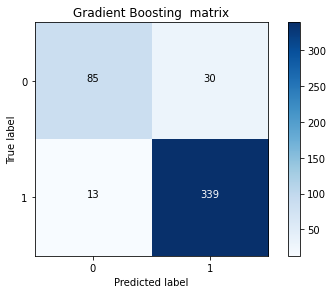

Accuracy    =     0.908
Precision   =     0.919
Recall      =     0.963
Specificity =     0.739
F1_score    =     0.940


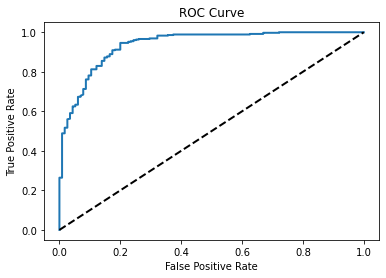

In [20]:
gbc = GradientBoostingClassifier()

gbc=gbc.fit(X_train_new, y_train)

y_pred = gbc.predict(X_test_new)
y_score = gbc.decision_function(X_test_new)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Gradient Boosting  matrix')

plt.show()

show_metrics()
gbc_sel_score=score(y_test, y_pred)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
gbc_roc=plot_roc()
gbc_roc

## <a > Gradient Boosting Models performance plot (accuracy, precision, recall)</a>

In [21]:
gbc_score

[0.9164882226980728, 0.9173333333333333, 0.9772727272727273]

In [22]:
gbc_sel_score

[0.9079229122055674, 0.9186991869918699, 0.9630681818181818]

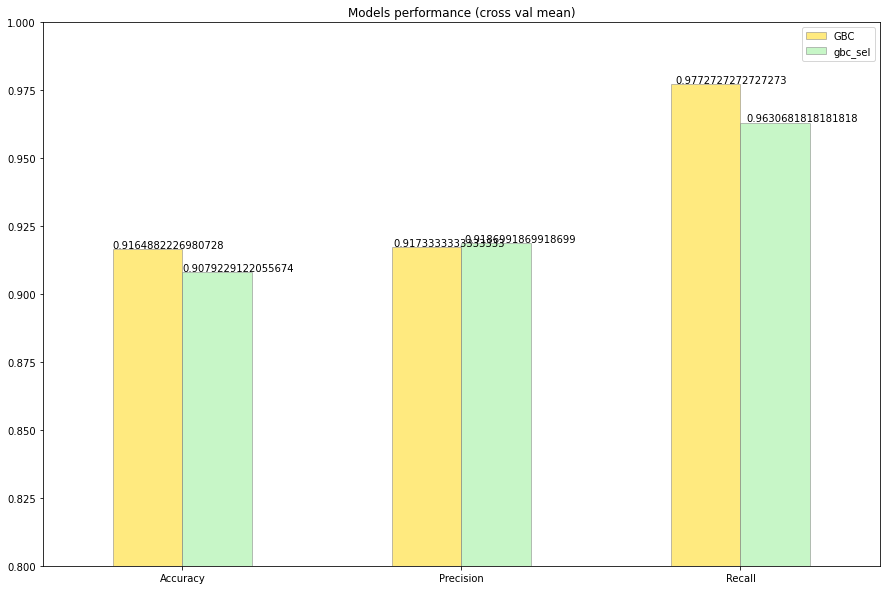

In [23]:
models_metrics = {'GBC': gbc_score,
                
                 'gbc_sel' : gbc_sel_score,
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1), 
        color = ['gold', 'lightgreen'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

## <a id='6'>6. Predictive model 2 : Logistic Regression </a>

In [24]:
from sklearn.linear_model import LogisticRegression

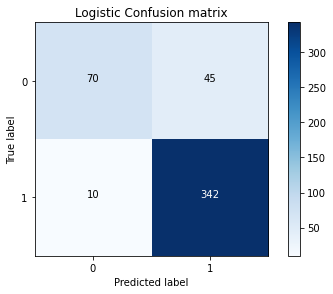

Accuracy    =     0.882
Precision   =     0.884
Recall      =     0.972
Specificity =     0.609
F1_score    =     0.926


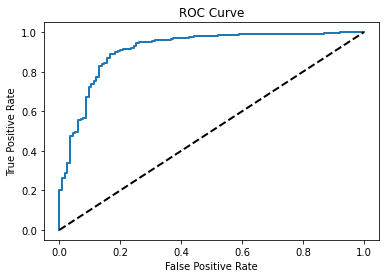

In [25]:
log = LogisticRegression()

log=log.fit(X_train, y_train)

y_pred = log.predict(X_test)
y_score = log.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')

plt.show()

show_metrics()
log_score=score(y_test, y_pred)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
log_roc=plot_roc()
log_roc

### <a id='6.1'>6.1. Logistic Regression  and GridSearch CV to optimise hyperparameters </a>


In [26]:
# Find the best parameters (recall)
log_cv = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log = GridSearchCV(estimator = log_cv, param_grid = param_grid ,cv=3,  verbose = 1, n_jobs = -1)
CV_log.fit(X_train, y_train)

best_parameters = CV_log.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 1000, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.5s finished


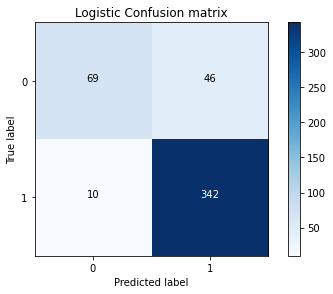

Accuracy    =     0.880
Precision   =     0.881
Recall      =     0.972
Specificity =     0.600
F1_score    =     0.924


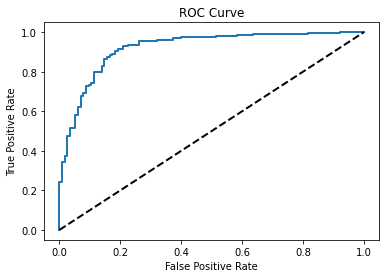

In [27]:
#Log with best hyperparameters
CV_log = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log.fit(X_train, y_train)
y_pred = CV_log.predict(X_test)
y_score = CV_log.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')

plt.show()

show_metrics()
CV_log_score=score(y_test, y_pred)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

### <a >6.2. Logistic Regression  and Feature Selection </a>

In [28]:
sel = SelectFromModel(RandomForestClassifier(),max_features = 11) 
sel.fit(X, y)
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)
print('X Shape is ' , X_train_new.shape)
print('Selected Features are : ' , sel.get_support())

X Shape is  (1399, 11)
Selected Features are :  [False False  True  True False False  True  True False False False False
 False  True False False False False False  True False  True  True  True
 False False False False  True  True False False False False False False
 False False False False False False False False False False False]


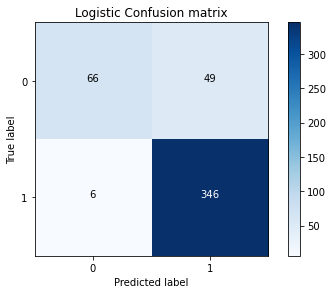

Accuracy    =     0.882
Precision   =     0.876
Recall      =     0.983
Specificity =     0.574
F1_score    =     0.926


In [29]:
log = LogisticRegression()

log=log.fit(X_train_new, y_train)

y_pred = log.predict(X_test_new)
y_score = log.decision_function(X_test_new)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')

plt.show()

show_metrics()
log_sel_score=score(y_test, y_pred)
# ROC curve
#fpr, tpr, t = roc_curve(y_test, y_score)
#plot_roc()


### <a >6.3 Logistic Models performance plot (accuracy, precision, recall)</a>

In [30]:
log_score

[0.8822269807280514, 0.8837209302325582, 0.9715909090909091]

In [31]:
CV_log_score

[0.880085653104925, 0.8814432989690721, 0.9715909090909091]

In [32]:
log_sel_score

[0.8822269807280514, 0.8759493670886076, 0.9829545454545454]

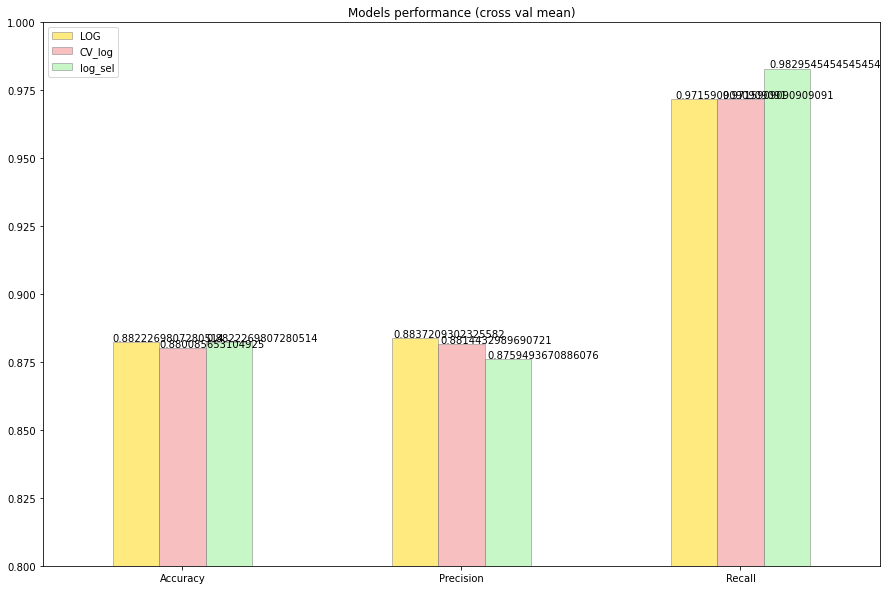

In [33]:
models_metrics = {'LOG': log_score,
                 'CV_log' : CV_log_score,
                 'log_sel' : log_sel_score,
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1), 
        color = ['gold','lightcoral', 'lightgreen'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

## <a id='7'>7. Predictive model 3 :Decision Tree Classifier </a>

In [34]:
from sklearn.tree import DecisionTreeClassifier

### >DecisionTreeClassifier & Naive Bayes(GaussianNB)

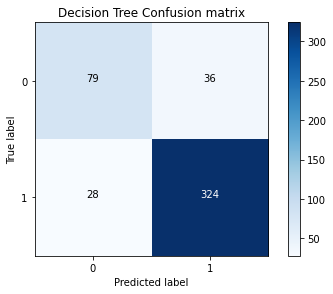

Accuracy    =     0.863
Precision   =     0.900
Recall      =     0.920
Specificity =     0.687
F1_score    =     0.910
[0.8629550321199143, 0.9, 0.9204545454545454]


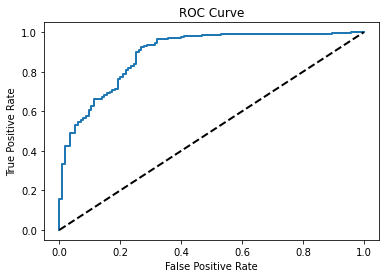

In [35]:
Dtree= DecisionTreeClassifier()
# NB_=GaussianNB()

# Dtree=DtreeingClassifier(estimators=[('Dtree',Dtree_),('NB',NB_)])
Dtree.fit(X_train, y_train)

y_pred = Dtree.predict(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Decision Tree Confusion matrix')
#plt.savefig('6')
plt.show()

show_metrics()
Dtree_score=score(y_test, y_pred)
print(Dtree_score)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
Dtree_roc=plot_roc()
Dtree_roc

## <a id='8'>8. Predictive model 4 : Support Vector Machine(svc) </a>

In [36]:
from sklearn.svm import SVC

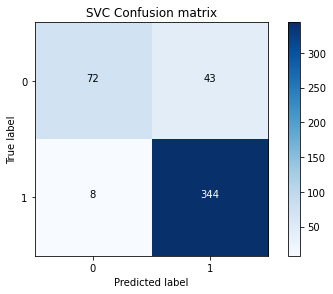

Accuracy    =     0.891
Precision   =     0.889
Recall      =     0.977
Specificity =     0.626
F1_score    =     0.931


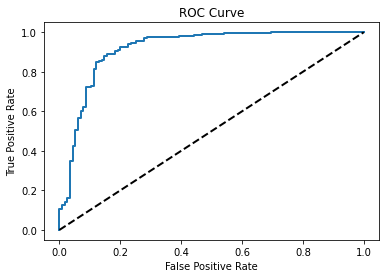

In [37]:
svc = SVC()

svc=svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
y_score = svc.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='SVC Confusion matrix')

plt.show()

show_metrics()
svc_score=score(y_test, y_pred)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
svc_roc=plot_roc()
svc_roc

### <a id='8.1'>8.1. SVC and GridSearch CV to optimise hyperparameters </a>

In [38]:
# Find the best parameters 
svc = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

CV_svc = GridSearchCV(estimator = svc, param_grid = param_grid ,  scoring = 'accuracy' ,refit=True,verbose=2)
CV_svc.fit(X_train, y_train)

best_parameters = CV_svc.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.9s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   40.3s finished


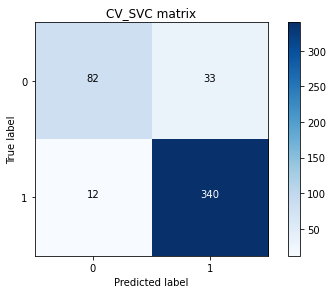

Accuracy    =     0.904
Precision   =     0.912
Recall      =     0.966
Specificity =     0.713
F1_score    =     0.938


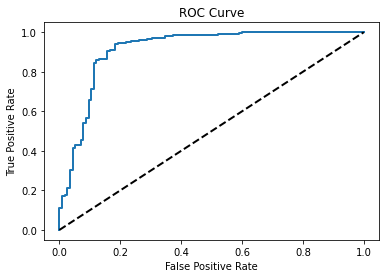

In [39]:
#SVC with best hyperparameters
CV_svc = SVC(C = best_parameters['C'], 
                                gamma = best_parameters['gamma'], 
                                kernel = best_parameters['kernel']
                                )

CV_svc=CV_svc.fit(X_train, y_train)
y_pred = CV_svc.predict(X_test)
y_score = CV_svc.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='CV_SVC matrix')
#plt.savefig('6')
plt.show()

show_metrics()
CV_svc_score=score(y_test, y_pred)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

### <a > Feature Selection </a>

In [40]:
sel = SelectFromModel(RandomForestClassifier(),max_features = 11) 
sel.fit(X, y)
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)
print('X Shape is ' , X_train_new.shape)
print('Selected Features are : ' , sel.get_support())

X Shape is  (1399, 11)
Selected Features are :  [False False  True  True False False  True  True False False False False
 False  True False False False False False  True False  True  True False
 False False False False  True  True False False False False False False
 False False False False False False False False False False  True]


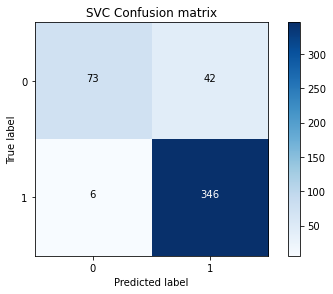

Accuracy    =     0.897
Precision   =     0.892
Recall      =     0.983
Specificity =     0.635
F1_score    =     0.935


In [41]:
svc= SVC()

svc=svc.fit(X_train_new, y_train)

y_pred = svc.predict(X_test_new)
y_score = svc.decision_function(X_test_new)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='SVC Confusion matrix')

plt.show()

show_metrics()
svc_sel_score=score(y_test, y_pred)



### <a > Models performance plot (accuracy, precision, recall)</a>

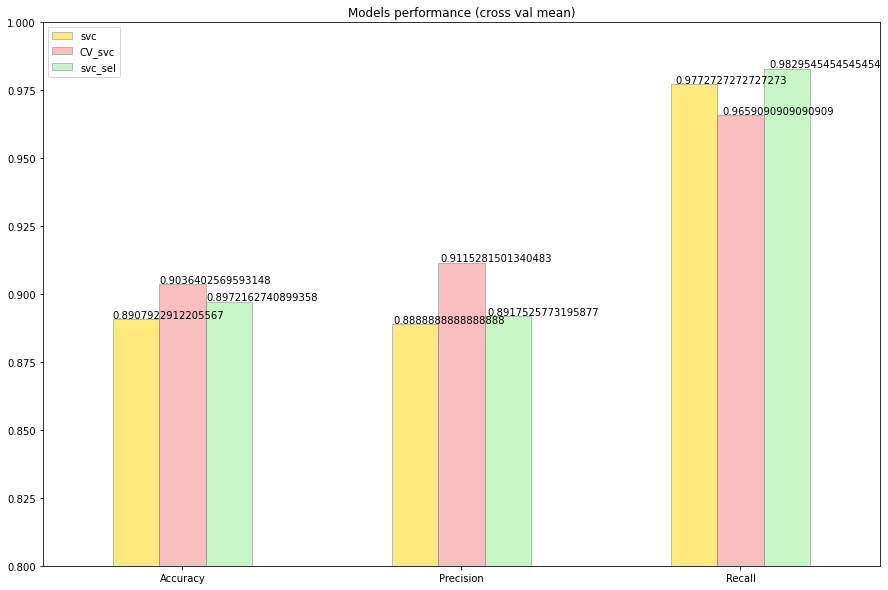

In [42]:
models_metrics = {'svc': svc_score,
                 'CV_svc' : CV_svc_score,
                 'svc_sel' : svc_sel_score,
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1), 
        color = ['gold','lightcoral', 'lightgreen'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

## <a id='9'>9. Predictive model 5 : K-Nearest Neighbor(KNN) </a>

In [43]:
from sklearn.neighbors import KNeighborsClassifier

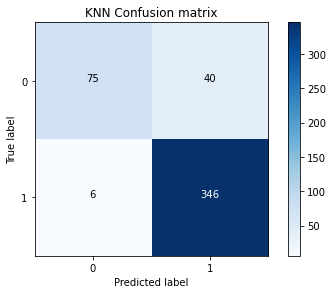

Accuracy    =     0.901
Precision   =     0.896
Recall      =     0.983
Specificity =     0.652
F1_score    =     0.938


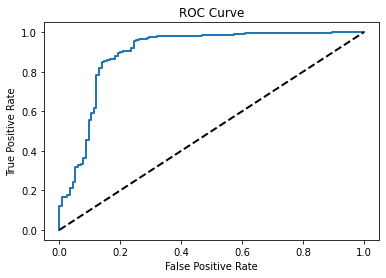

In [44]:
knn = KNeighborsClassifier()

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='KNN Confusion matrix')

plt.show()

show_metrics()
knn_score=score(y_test, y_pred)
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
knn_roc=plot_roc()
knn_roc

### <a id='9.1'>9.1. K-Nearest Neighbor(KNN) and GridSearch CV to optimise hyperparameters </a>

In [45]:
# Find the best parameters
knn = KNeighborsClassifier()

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

CV_KNN = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
CV_KNN.fit(X_train, y_train)

best_parameters = CV_KNN.best_params_
print('The best parameters for using this model is', best_parameters)

The best parameters for using this model is {'n_neighbors': 6, 'weights': 'distance'}


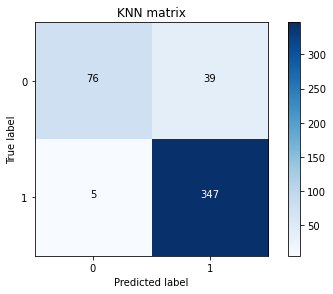

Accuracy    =     0.906
Precision   =     0.899
Recall      =     0.986
Specificity =     0.661
F1_score    =     0.940
[0.9014989293361885, 0.8963730569948186, 0.9829545454545454]


In [46]:
#KNN with best hyperparameters
CV_KNN = KNeighborsClassifier(n_neighbors = best_parameters['n_neighbors'], 
                                weights = best_parameters['weights']
                                )

CV_KNN=CV_KNN.fit(X_train, y_train)
y_pred = CV_KNN.predict(X_test)


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='KNN matrix')
plt.show()

show_metrics()
CV_knn_score=score(y_test, y_pred)
print(knn_score)


### <a > K-Nearest Neighbor(KNN)  and Feature Selection </a>

In [47]:
sel = SelectFromModel(RandomForestClassifier(),max_features = 11) 
sel.fit(X, y)
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)
print('X Shape is ' , X_train_new.shape)
print('Selected Features are : ' , sel.get_support())

X Shape is  (1399, 11)
Selected Features are :  [False False  True  True False False  True  True False False False False
 False  True False False False False False  True False  True  True False
 False False False False  True  True False False False False False False
 False False False False False False False False False False  True]


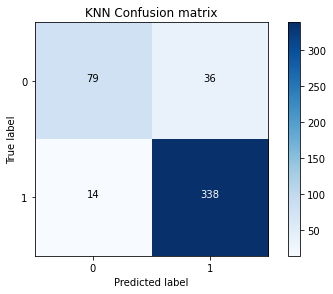

Accuracy    =     0.893
Precision   =     0.904
Recall      =     0.960
Specificity =     0.687
F1_score    =     0.931


In [48]:
knn = KNeighborsClassifier()

knn=knn.fit(X_train_new, y_train)

y_pred = knn.predict(X_test_new)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='KNN Confusion matrix')

plt.show()

show_metrics()
knn_sele_score=score(y_test, y_pred)


### <a> KNN-Models performance plot (accuracy, precision, recall)</a>

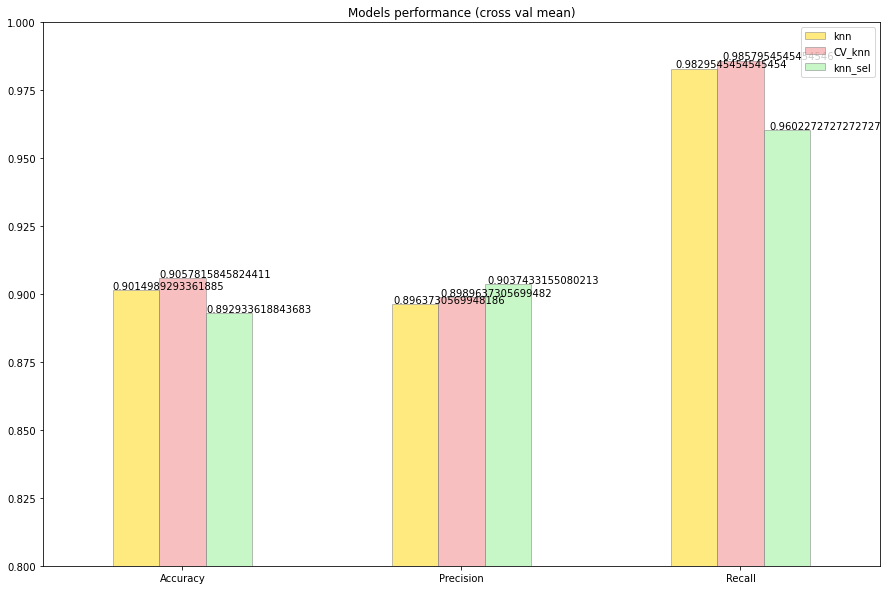

In [49]:
models_metrics = {'knn': knn_score,
                 'CV_knn' : CV_knn_score,
                 'knn_sel' : knn_sele_score,
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1), 
        color = ['gold','lightcoral', 'lightgreen'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

## <a id='10'>10. Models performance plot (accuracy, precision, recall)

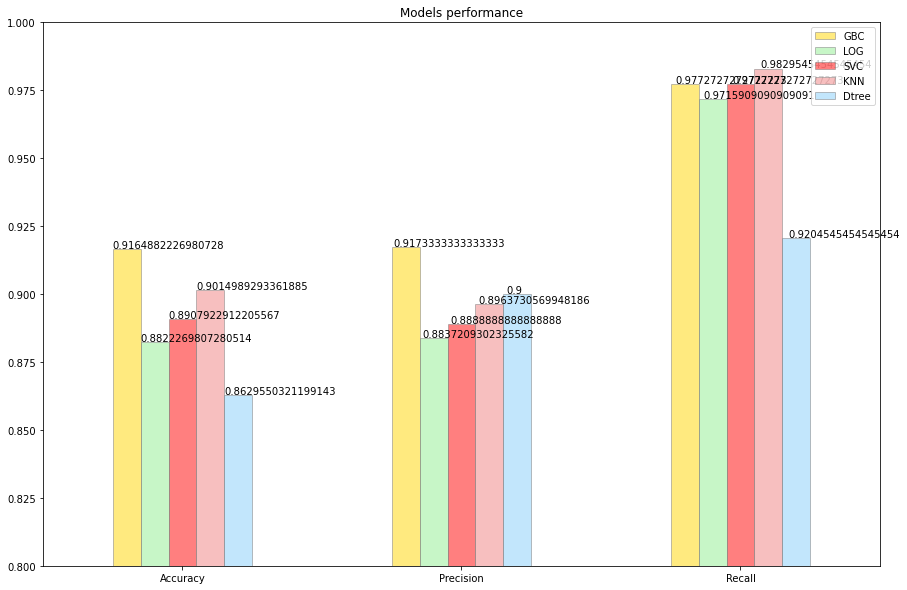

In [50]:
models_metrics = {'GBC': gbc_score, 
                 'LOG': log_score, 
                 'SVC' : svc_score,
                 'KNN' : knn_score,
                'Dtree': Dtree_score,
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1), 
        color = ['gold', 'lightgreen', 'red','lightcoral', 'lightskyblue'],
        rot = 0, title ='Models performance',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

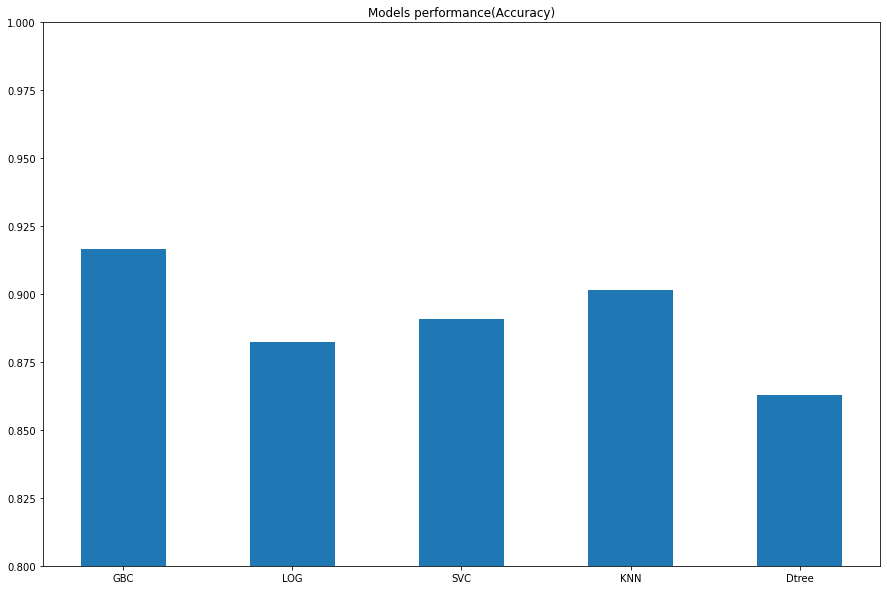

In [51]:
#fig = plt.figure()
#fig.add_axes([0,0,1,1])
models=['GBC','LOG','SVC','KNN', 'Dtree']

acc=[gbc_score[0],log_score[0],svc_score[0],knn_score[0],Dtree_score[0]]
plt.figure(figsize=(15,10))
plt.ylim(0.80, 1)

plt.title('Models performance(Accuracy)')
plt.bar(models,acc,width=.5)
plt.show()


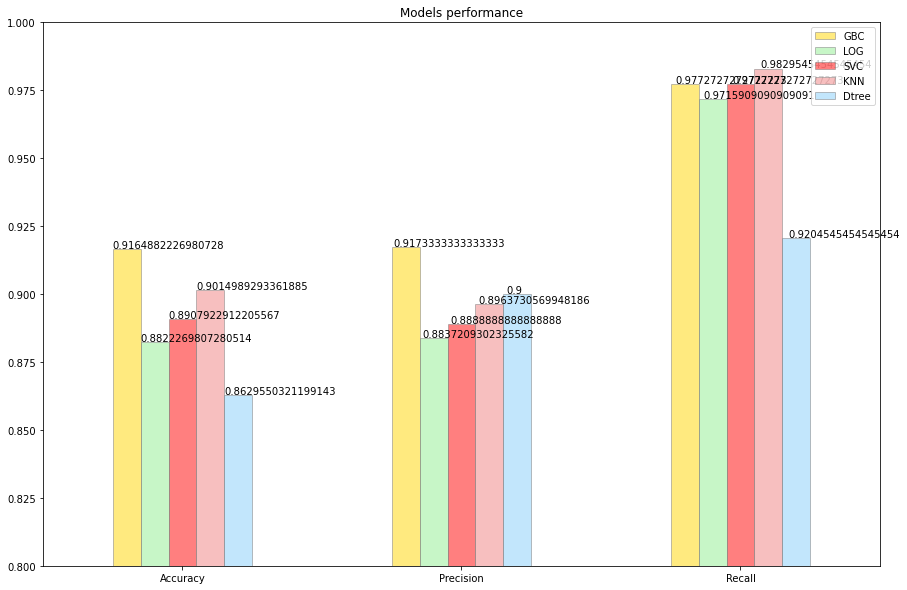

In [52]:
models_metrics = {'GBC': gbc_score, 
                 'LOG': log_score, 
                 'SVC' : svc_score,
                 'KNN' : knn_score,
                'Dtree': Dtree_score,
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1), 
        color = ['gold', 'lightgreen', 'red','lightcoral', 'lightskyblue'],
        rot = 0, title ='Models performance',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

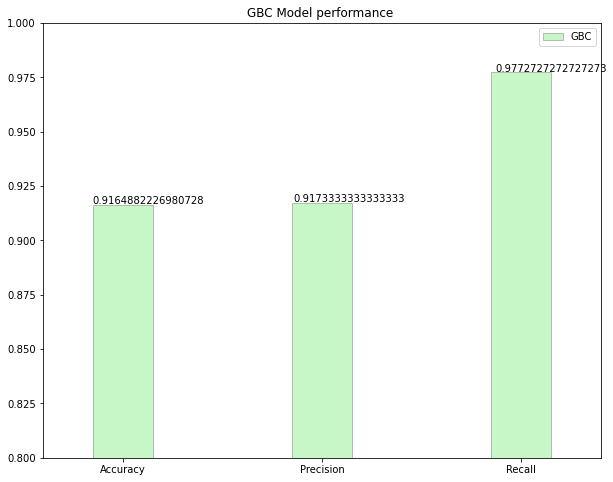

In [53]:
models_metrics = {'GBC': gbc_score}
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (10,8), ylim = (0.80, 1), width=0.3,
        color = [ 'lightgreen'],
        rot = 0, title ='GBC Model performance ',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

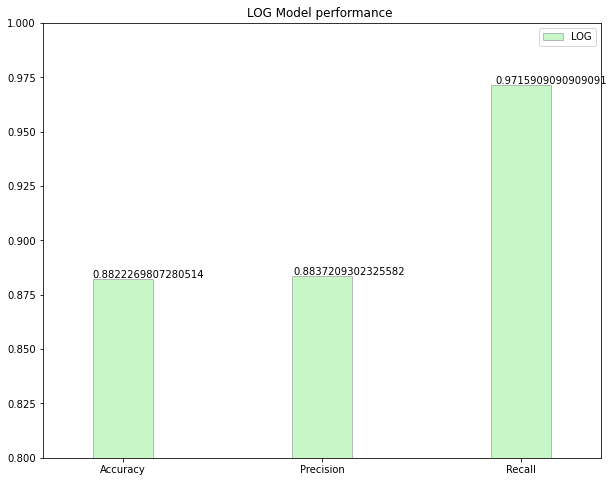

In [54]:
models_metrics = {'LOG': log_score}
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (10,8), ylim = (0.80, 1), width=0.3,
        color = [ 'lightgreen'],
        rot = 0, title ='LOG Model performance ',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

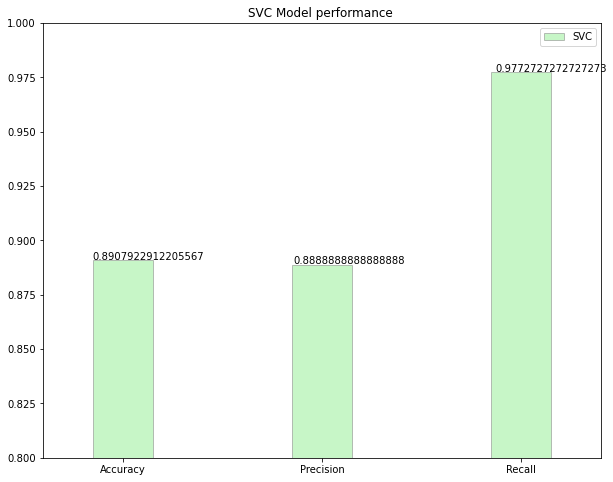

In [55]:
models_metrics = {'SVC' : svc_score,}
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (10,8), ylim = (0.80, 1), width=0.3,
        color = [ 'lightgreen'],
        rot = 0, title ='SVC Model performance ',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

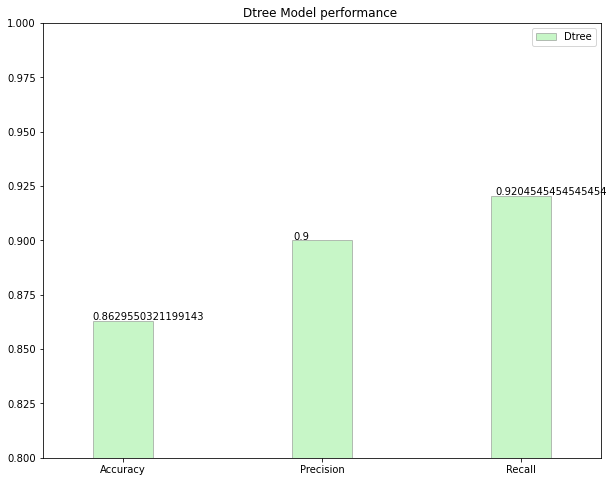

In [57]:
models_metrics = {'Dtree': Dtree_score}
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (10,8), ylim = (0.80, 1), width=0.3,
        color = [ 'lightgreen'],
        rot = 0, title ='Dtree Model performance ',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

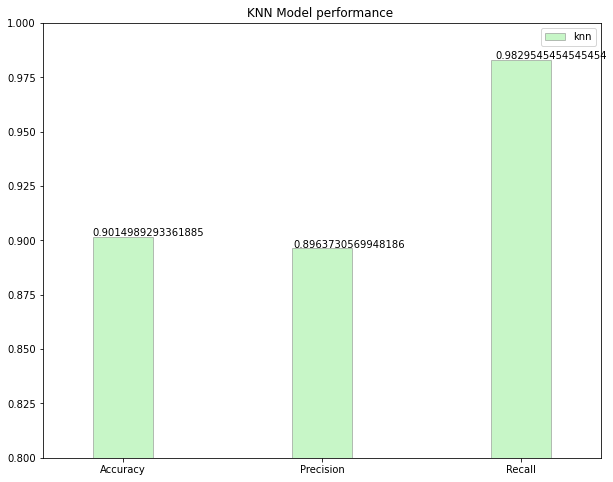

In [67]:
models_metrics = {'knn': knn_score}
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (10,8), ylim = (0.80, 1), width=0.3,
        color = [ 'lightgreen'],
        rot = 0, title ='KNN Model performance ',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

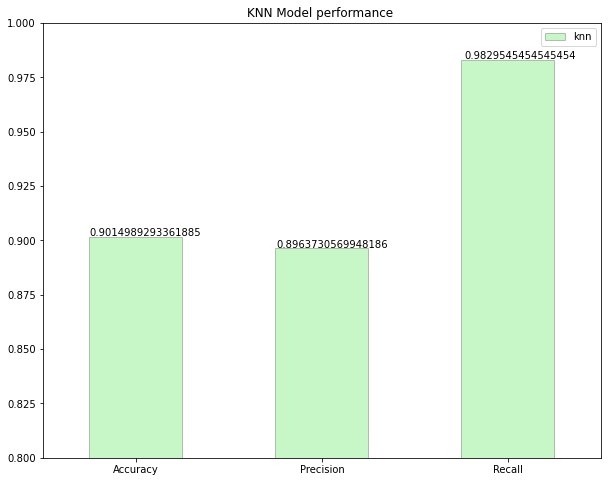

In [58]:
models_metrics = {'knn': knn_score}
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall' }, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (10,8), ylim = (0.80, 1), 
        color = [ 'lightgreen'],
        rot = 0, title ='KNN Model performance ',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

**Thank you all ! Merci à tous ! :)**